In [1]:
import string
import re
from nltk import word_tokenize
import nltk
from nltk.probability import FreqDist
from nltk.corpus import stopwords
import pymorphy2
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [2]:
f = open('ХрюшаAnalysis.txt', "r", encoding='utf-8')

In [3]:
text = f.read()

In [4]:
print(text[:300])

﻿Хрюша
Рассветные лучи заиграли на занавесках и осветили спальню. Половину комнаты занимала двуспальная кровать, заваленная разноцветными подушками всевозможных форм и размеров. В противоположном углу возвышался резной шкаф с покосившимися дверцами. На полу был расстелен потёртый ковёр. С потолка св


In [5]:
text = text.lower()

In [6]:
spec_chars = string.punctuation + '«»\t—…’–'

In [7]:
text = "".join([ch for ch in text if ch not in spec_chars])

In [8]:
text = re.sub('\n', ' ', text)

In [9]:
text = "".join([ch for ch in text if ch not in string.digits])

In [101]:
print(text[:300])

﻿хрюша рассветные лучи заиграли на занавесках и осветили спальню половину комнаты занимала двуспальная кровать заваленная разноцветными подушками всевозможных форм и размеров в противоположном углу возвышался резной шкаф с покосившимися дверцами на полу был расстелен потёртый ковёр с потолка свисала


In [10]:
morph = pymorphy2.MorphAnalyzer()

In [146]:
filtered_tokens = []

In [14]:
text_tokens = word_tokenize(text)

In [15]:
noun_tokens = []
adjf_tokens = []
verb_tokens = []

In [16]:
for token in text_tokens:
    p = morph.parse(str(token))[0]
    if "NOUN" in p.tag:
        noun_tokens.append(p.normal_form)
    elif "ADJF" in p.tag or "ADJS" in p.tag:
        adjf_tokens.append(p.normal_form)
    elif "VERB" in p.tag or "INFN" in p.tag:
        verb_tokens.append(p.normal_form)

In [17]:
def text_cloud(tokens):
    text = nltk.Text(tokens)
    fdist = FreqDist(text)
    print(fdist.most_common(5))
    russian_stopwords = stopwords.words("russian")
    text_tokens = [token.strip() for token in tokens if token not in russian_stopwords]
    text = nltk.Text(text_tokens)
    fdist_sw = FreqDist(text)
    print(fdist_sw.most_common(10))
    russian_stopwords.extend(['это', 'что','всё','который', 'свой','говорить','сказать','думать','человек','ещё','весь','лицо','время','мочь','знать','видеть'])
    text_tokens = [token.strip() for token in text_tokens if token not in russian_stopwords]
    text = nltk.Text(text_tokens)
    fdist_sw = FreqDist(text)
    text_raw = " ".join(text)
    wordcloud = WordCloud(width=1600, height=800).generate(text_raw)
    plt.figure( figsize=(20,10), facecolor='k')
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.show()

fdist = FreqDist(text)

print(fdist.most_common(5))

russian_stopwords = stopwords.words('russian')

russian_stopwords.extend(['это', 'чтò','всё','сказал', 'сказала','говорил','говорила'])

text_tokens = [token.strip() for token in filtered_tokens if token not in russian_stopwords]

text = nltk.Text(text_tokens)

fdist = FreqDist(text)

print(fdist.most_common)

text_raw = " ".join(text)

wordcloud = WordCloud(width = 1600, height=800).generate(text_raw)

plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

[('хрюш', 23), ('дядя', 9), ('сев', 8), ('забор', 6), ('день', 6)]
[('хрюш', 23), ('дядя', 9), ('сев', 8), ('забор', 6), ('день', 6), ('захарович', 4), ('клавдия', 3), ('ловушка', 3), ('дверь', 3), ('капкан', 3)]


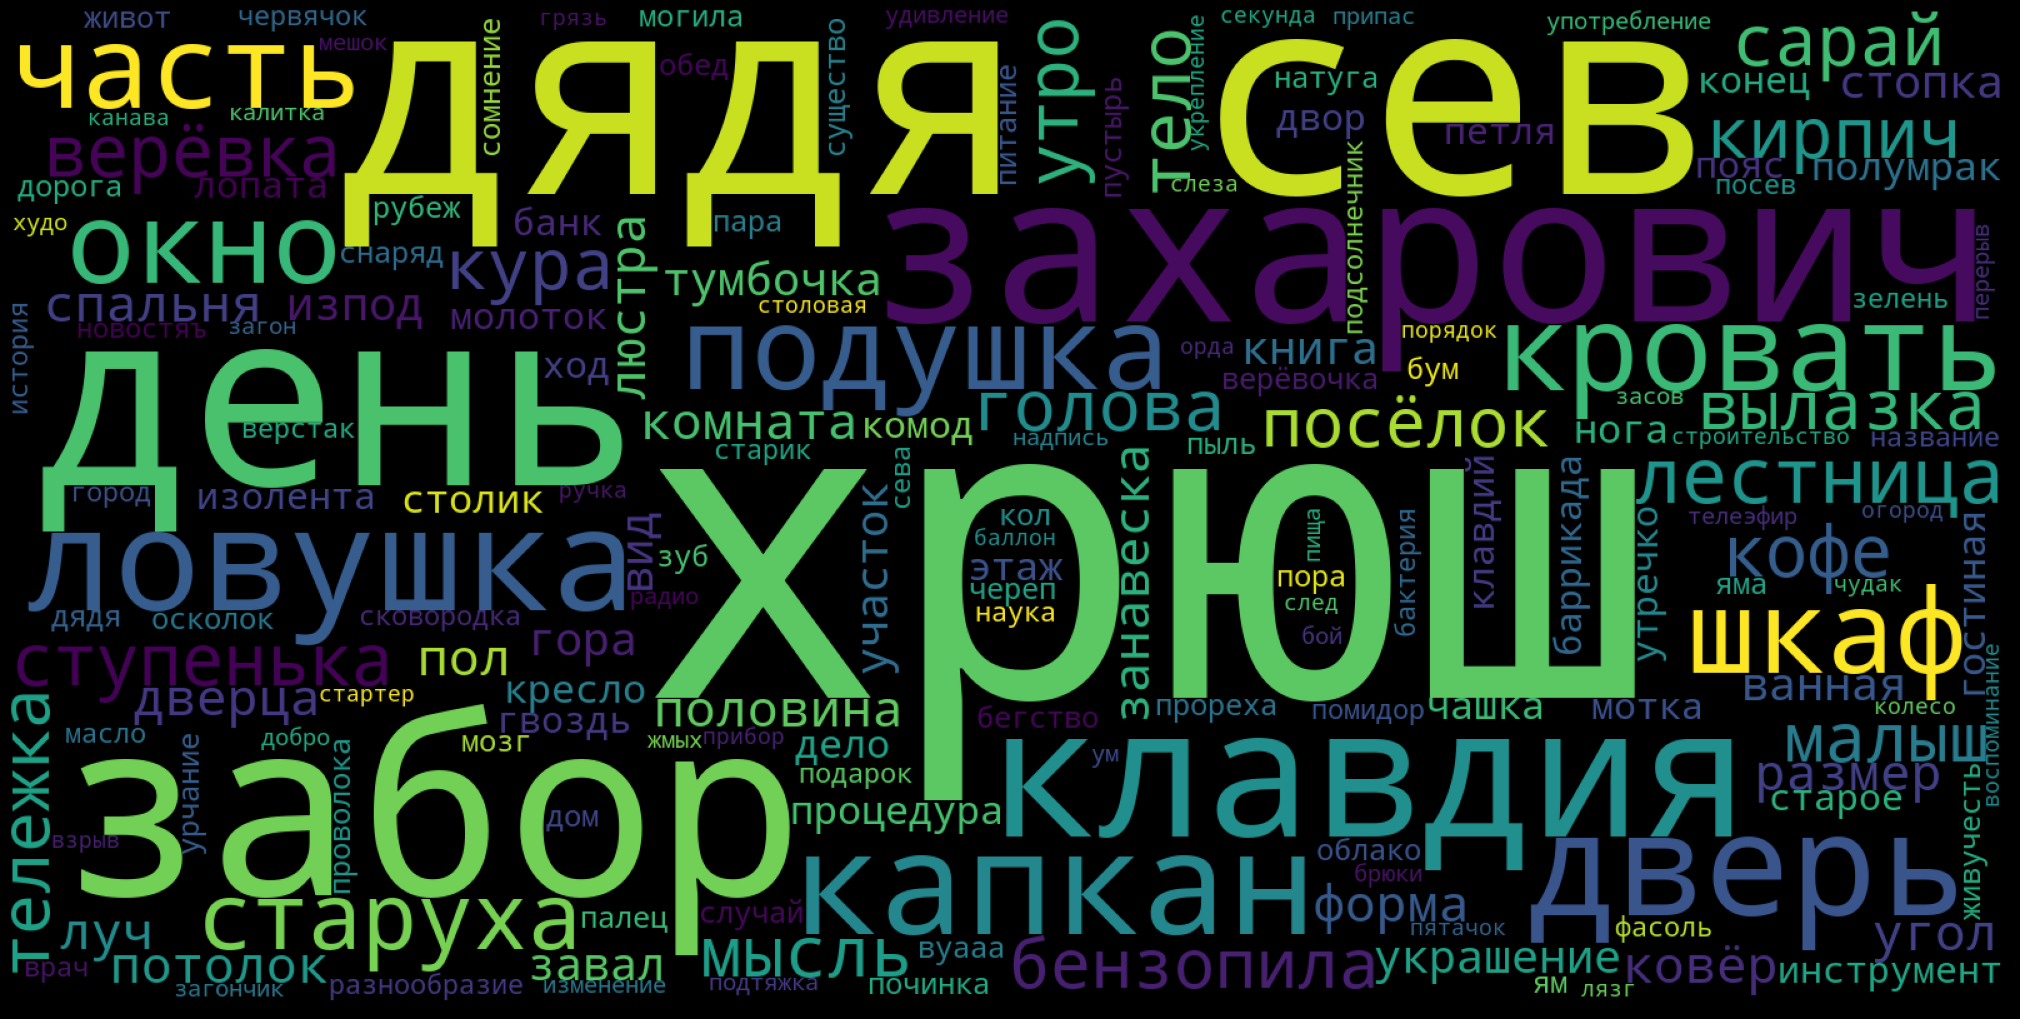

In [22]:
text_cloud(noun_tokens)